In [20]:
!pip install newsapi-python

In [21]:
import pandas as pd
import numpy as np
from datetime import *

In [22]:
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key='83873d1a7f0842e7a34eba6c06dfd98e')

In [25]:
sources = newsapi.get_sources()

In [26]:
sources_list = []
for source in sources['sources']:
    sources_list.append(source['id'])

print(len(sources_list))
sources_list

128


['abc-news',
 'abc-news-au',
 'aftenposten',
 'al-jazeera-english',
 'ansa',
 'argaam',
 'ars-technica',
 'ary-news',
 'associated-press',
 'australian-financial-review',
 'axios',
 'bbc-news',
 'bbc-sport',
 'bild',
 'blasting-news-br',
 'bleacher-report',
 'bloomberg',
 'breitbart-news',
 'business-insider',
 'business-insider-uk',
 'buzzfeed',
 'cbc-news',
 'cbs-news',
 'cnn',
 'cnn-es',
 'crypto-coins-news',
 'der-tagesspiegel',
 'die-zeit',
 'el-mundo',
 'engadget',
 'entertainment-weekly',
 'espn',
 'espn-cric-info',
 'financial-post',
 'focus',
 'football-italia',
 'fortune',
 'four-four-two',
 'fox-news',
 'fox-sports',
 'globo',
 'google-news',
 'google-news-ar',
 'google-news-au',
 'google-news-br',
 'google-news-ca',
 'google-news-fr',
 'google-news-in',
 'google-news-is',
 'google-news-it',
 'google-news-ru',
 'google-news-sa',
 'google-news-uk',
 'goteborgs-posten',
 'gruenderszene',
 'hacker-news',
 'handelsblatt',
 'ign',
 'il-sole-24-ore',
 'independent',
 'infobae',
 '

In [27]:
n_days = 30
query = 'tropical storm'
page = 1
page_size = 100

def get_response_json(query, n_days, source, page_size, page):
    response_json = newsapi.get_everything(q=query,
                                            language='en',
                                            from_param=str(date.today() - timedelta(days=n_days)),
                                            to= str(date.today()),
                                            sources = source,
                                            page_size=page_size,
                                            page = page,
                                            sort_by='relevancy')
    return response_json



results = []





for i in range(50):
    results.append(get_response_json(query, n_days, sources_list[i], page_size, page))

In [29]:
len(results)

50

In [30]:
results[0]

{'status': 'ok',
 'totalResults': 31,
 'articles': [{'source': {'id': 'abc-news', 'name': 'ABC News'},
   'author': 'Daniel Manzo',
   'title': 'Tropical Storm Eta making landfall in Cuba, heads towards Southern Florida',
   'description': 'Tropical Storm Eta is making landfall this morning along the south-central Coast of Cuba with winds of 65 mph.',
   'url': 'https://abcnews.go.com/US/tropical-storm-eta-making-landfall-cuba-heads-southern/story?id=74089602',
   'urlToImage': 'https://s.abcnews.com/images/International/eta-guatem_hpMain_20201108-070247_16x9_992.jpg',
   'publishedAt': '2020-11-08T12:15:41Z',
   'content': 'Tropical Storm Eta is making landfall this morning along the south-central Coast of Cuba with winds of 65 mph.\r\nThe last named storm to make landfall in Cuba during November was Paloma in 2008.\r\nEta … [+2916 chars]'},
  {'source': {'id': 'abc-news', 'name': 'ABC News'},
   'author': 'Max Golembo, Julia Jacobo',
   'title': 'Eta floods Florida after making landf

In [83]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [84]:
# Create an empty string

# Loop through all the headlines and add them to 'text_combined' 
for i in range(len(results)):
    text_combined = ''
    for j in results[i]['articles']:
        text_combined += j['title'] + ''
        print(text_combined)

Tropical Storm Eta making landfall in Cuba, heads towards Southern Florida
Tropical Storm Eta making landfall in Cuba, heads towards Southern FloridaEta floods Florida after making landfall as strong tropical storm
Tropical Storm Eta making landfall in Cuba, heads towards Southern FloridaEta floods Florida after making landfall as strong tropical stormHurricane watch for Florida as Eta strengthens, ice and snow in the Midwest
Tropical Storm Eta making landfall in Cuba, heads towards Southern FloridaEta floods Florida after making landfall as strong tropical stormHurricane watch for Florida as Eta strengthens, ice and snow in the MidwestTropical Storm Iota forecast to hit Central America as major hurricane
Tropical Storm Eta making landfall in Cuba, heads towards Southern FloridaEta floods Florida after making landfall as strong tropical stormHurricane watch for Florida as Eta strengthens, ice and snow in the MidwestTropical Storm Iota forecast to hit Central America as major hurricaneE

In [90]:
# To increase the accuracy, we excluded some certain keywords using the stopwords
STOPWORDS.add('hurricane')
STOPWORDS.add('tropical')
STOPWORDS.add('storm')
STOPWORDS.add('update')

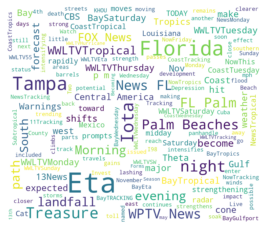

In [93]:
wordcloud = WordCloud(background_color="white", width=1000, height=860, margin=2, max_font_size=110).generate(text_combined)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file('Tropical Storm.png')